In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df1 = pd.read_csv('F:\\Python_practice\\CSV\\archive\\65 Years of Weather Data Bangladesh (1948 - 2013).csv')
df1.head()

,Unnamed: 0,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


In [16]:
dataset = df1.drop(['Unnamed: 0','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period'],axis =1)
dataset

,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950
1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950
2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950
3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950
4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950
...,...,...,...,...,...,...,...,...,...,...,...
21115,Teknaf,2009,12,30.3,16.5,0.0,72.0,2.800000,0.9,8.700000,41998
21116,Teknaf,2010,12,31.7,16.7,193.0,79.0,2.400000,1.4,5.500000,41998
21117,Teknaf,2011,12,31.5,16.4,0.0,73.0,0.000000,1.5,7.400000,41998
21118,Teknaf,2012,12,30.0,15.8,0.0,70.0,1.800000,0.2,9.000000,41998


In [17]:
dataset. isnull().sum()

Station Names        0
YEAR                 0
Month                0
Max Temp             0
Min Temp             0
Rainfall             0
Relative Humidity    0
Wind Speed           0
Cloud Coverage       0
Bright Sunshine      0
Station Number       0
dtype: int64

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Max Temp'}>],
       [<Axes: title={'center': 'Min Temp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Relative Humidity'}>],
       [<Axes: title={'center': 'Wind Speed'}>,
        <Axes: title={'center': 'Cloud Coverage'}>,
        <Axes: title={'center': 'Bright Sunshine'}>],
       [<Axes: title={'center': 'Station Number'}>, <Axes: >, <Axes: >]],
      dtype=object)

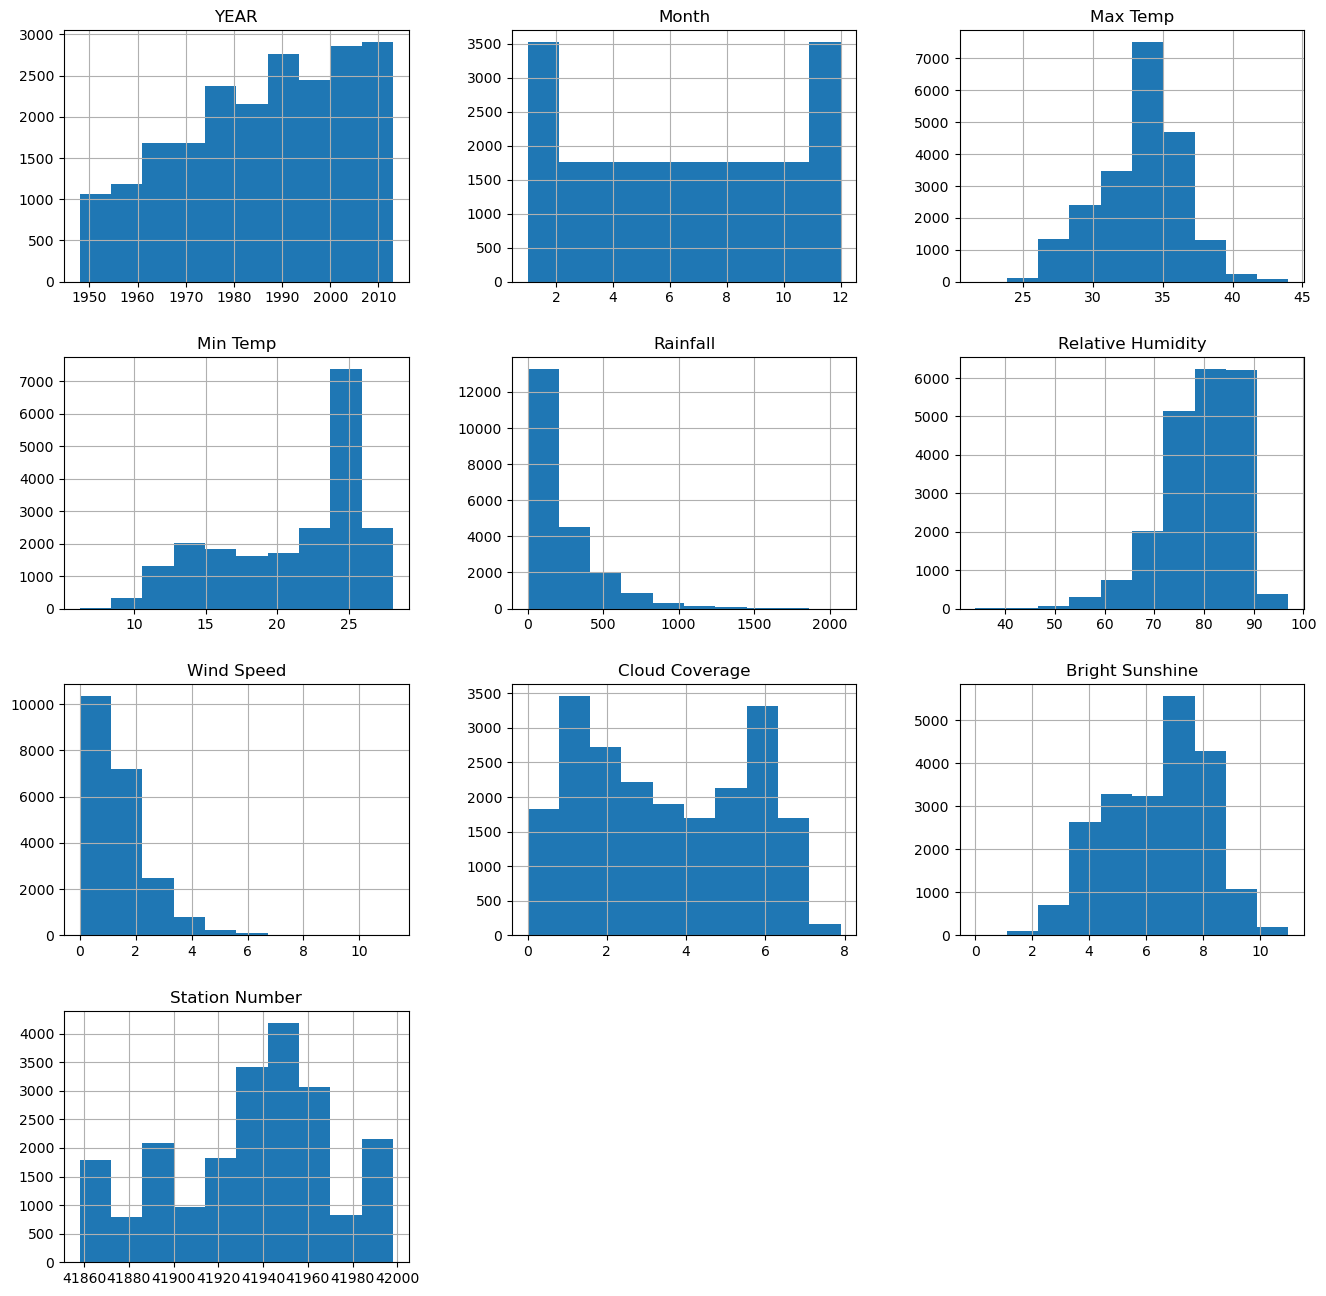

In [18]:
dataset.hist(figsize=(16,16))

<Axes: xlabel='YEAR'>

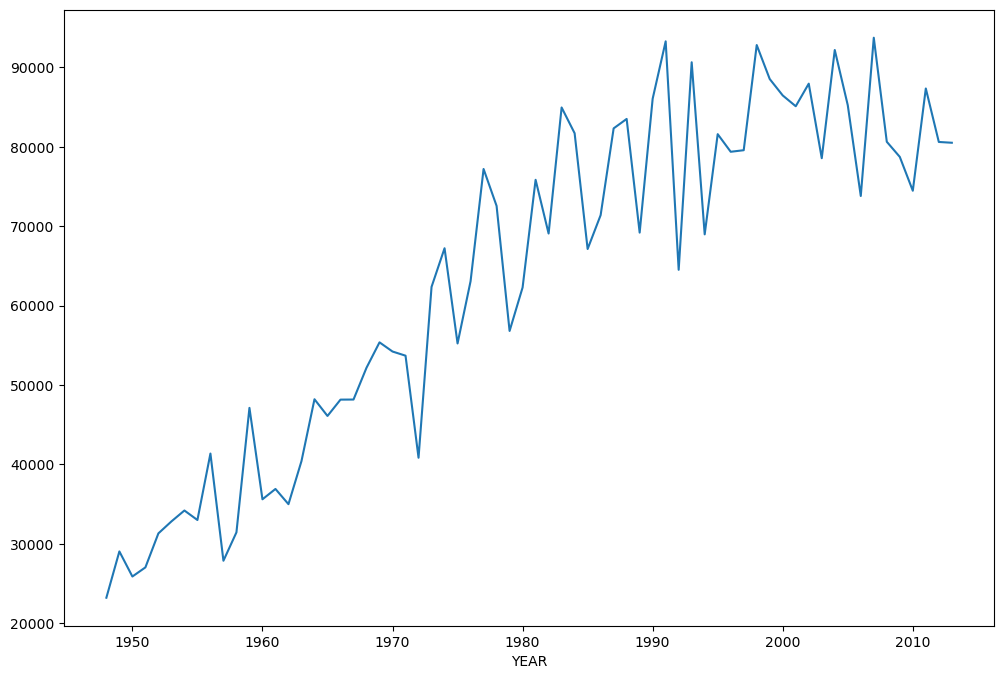

In [19]:
dataset.groupby("YEAR").sum()['Rainfall'].plot(figsize=(12,8))

<Axes: xlabel='Month'>

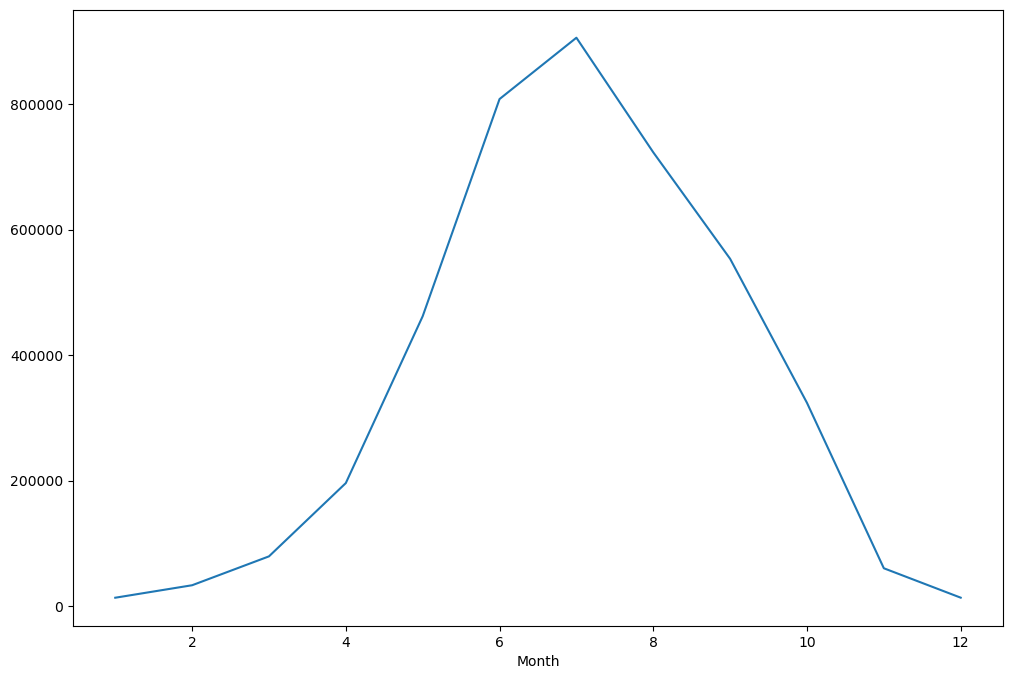

In [21]:
dataset.groupby("Month").sum()['Rainfall'].plot(figsize=(12,8))

<Axes: ylabel='Station Names'>

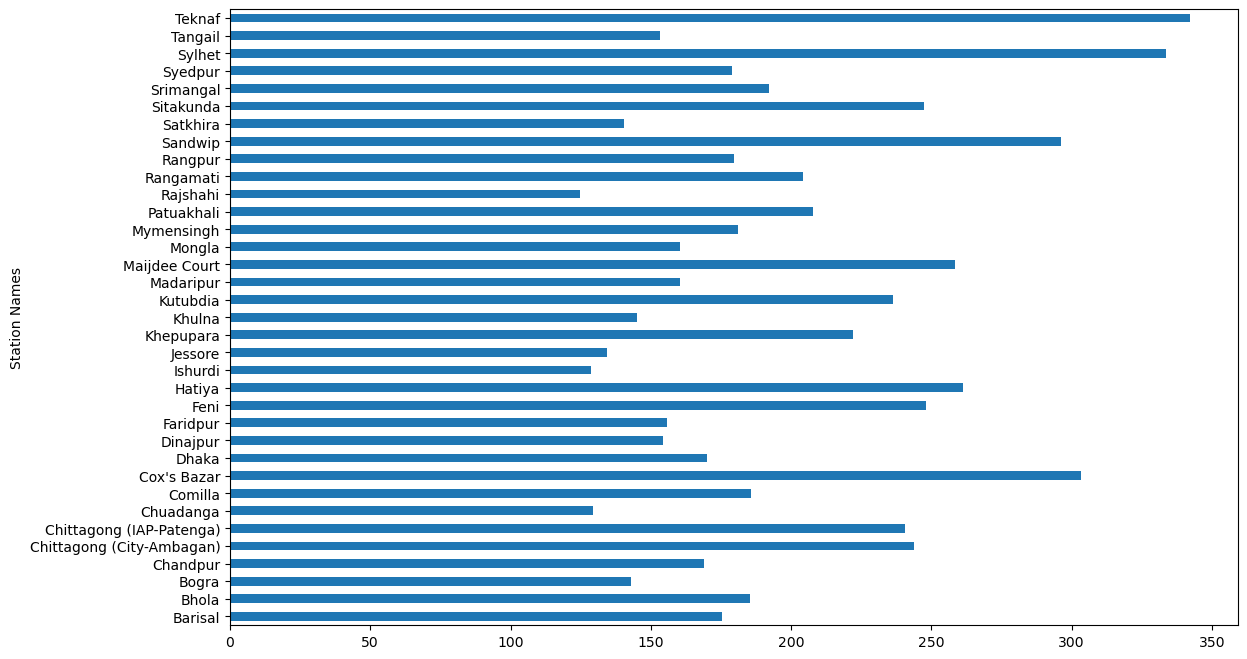

In [24]:
dataset.groupby("Station Names").mean()['Rainfall'].plot.barh(stacked=True,figsize=(13,8))

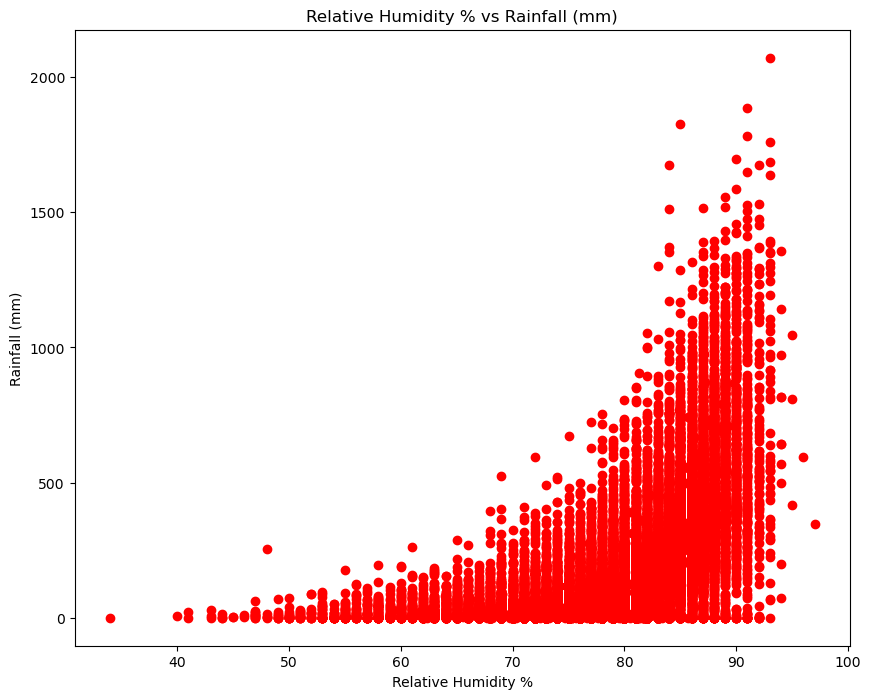

In [26]:
plt.figure(figsize=(10, 8))
x = dataset['Relative Humidity']
y = dataset['Rainfall']
plt.scatter(x, y, color='red')
plt.title("Relative Humidity % vs Rainfall (mm)")
plt.xlabel("Relative Humidity %")
plt.ylabel("Rainfall (mm)")
plt.show()

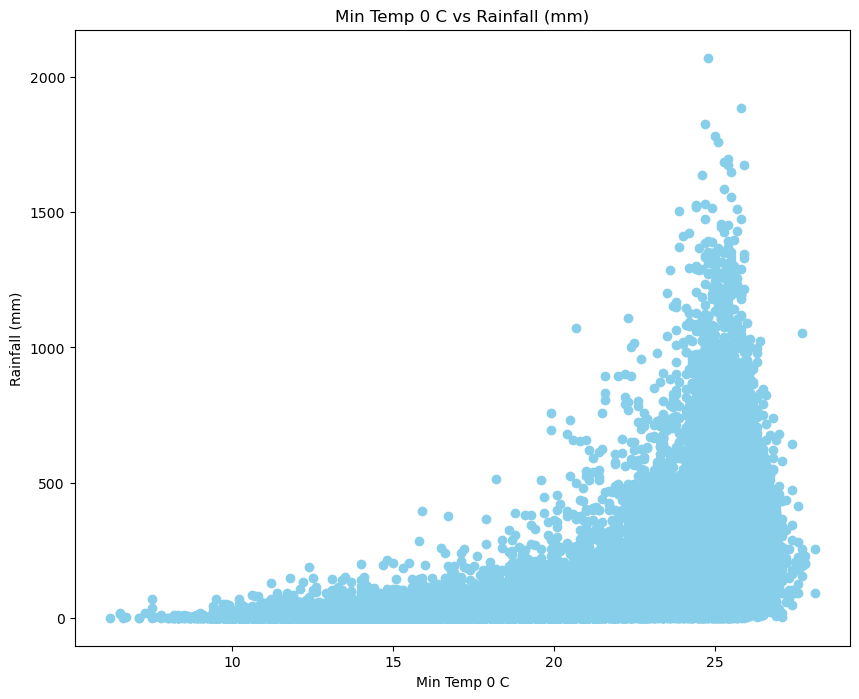

In [27]:
plt.figure(figsize=(10, 8))
x = dataset['Min Temp']
y = dataset['Rainfall']
plt.scatter(x, y, color='skyblue')
plt.title("Min Temp 0 C vs Rainfall (mm)")
plt.xlabel("Min Temp 0 C")
plt.ylabel("Rainfall (mm)")
plt.show()

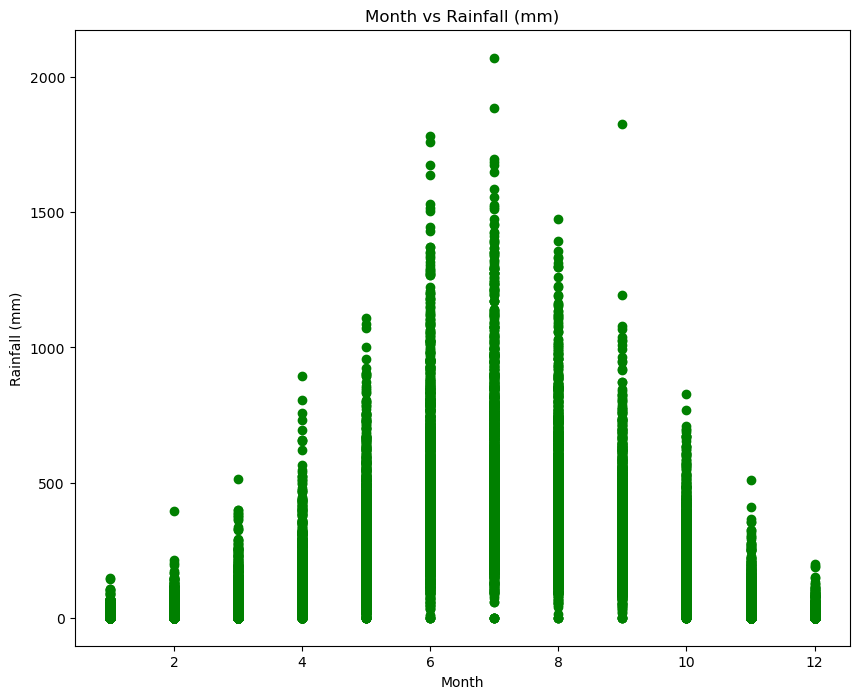

In [28]:
plt.figure(figsize=(10, 8))
x = dataset['Month']
y = dataset['Rainfall']
plt.scatter(x, y, color='green')
plt.title("Month vs Rainfall (mm)")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.show()

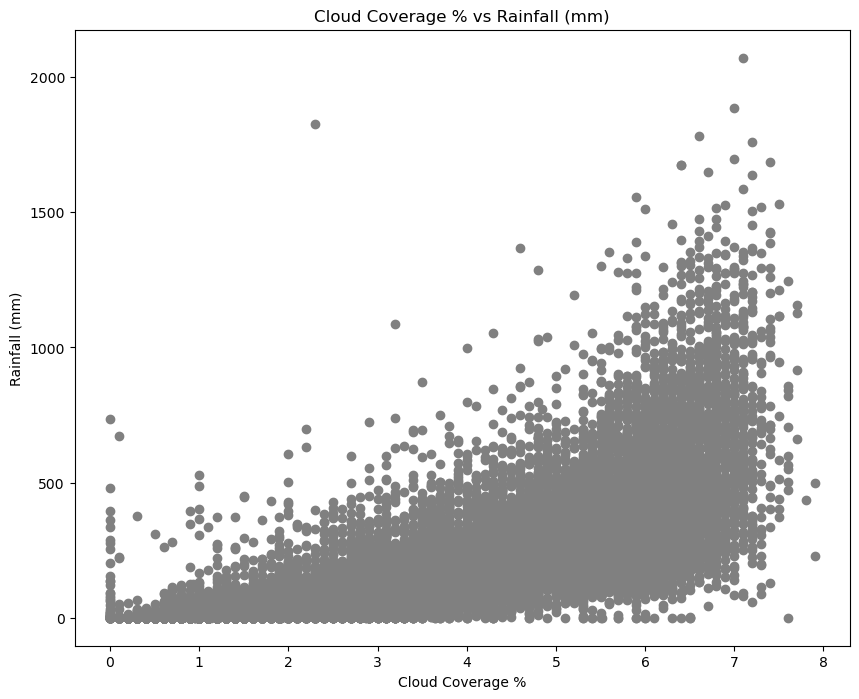

In [29]:
plt.figure(figsize=(10, 8))
x = dataset['Cloud Coverage']
y = dataset['Rainfall']
plt.scatter(x, y, color='Grey')
plt.title("Cloud Coverage % vs Rainfall (mm)")
plt.xlabel("Cloud Coverage %")
plt.ylabel("Rainfall (mm)")
plt.show() 

In [34]:
from sklearn.model_selection import train_test_split
x, y = dataset[['Month', 'Min Temp', 'Relative Humidity',
       'Cloud Coverage','Station Number']], dataset[['Rainfall']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
a = x_train.index
b = x_test.index
training_index = pd.DataFrame(a)
testing_index = pd.DataFrame(b)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# define a fuction
Model_MLR=LinearRegression()
# fit the model with split dataset
Model_MLR.fit(x_train,y_train)

LinearRegression()

In [37]:
Model_MLR.coef_

array([[-2.02505247, -7.11577034,  4.60115397, 91.25511225,  0.56378923]])

In [42]:
Model_MLR_prediction_test = Model_MLR.predict(x_test)
Model_MLR_prediction_train = Model_MLR.predict(x_train)

In [43]:
Model_MLR_rmse_train = np.sqrt(mean_squared_error(y_train, Model_MLR_prediction_train))
Model_MLR_rmse_train

148.4157861436172

In [44]:
Model_MLR_rmse_test = np.sqrt(mean_squared_error(y_test, Model_MLR_prediction_test))
Model_MLR_rmse_test

148.94972408249404

In [45]:
Model_MLR_r2_train = r2_score(y_train, Model_MLR_prediction_train)
Model_MLR_r2_train

0.6147588508155055

In [46]:

Model_MLR_r2_test = r2_score(y_test, Model_MLR_prediction_test)
Model_MLR_r2_test

0.6103222498316605

In [49]:
MLR_result_train = dataset.iloc[training_index[0]]
MLR_result_train = MLR_result_train.reset_index(drop = True)
MLR_result_train['Predicted Rainfall (mm)'] = pd.DataFrame(Model_MLR_prediction_train)

MLR_result_test = dataset.iloc[testing_index[0]]
MLR_result_test = MLR_result_test.reset_index(drop = True)
MLR_result_test['Predicted Rainfall (mm)'] = pd.DataFrame(Model_MLR_prediction_test)

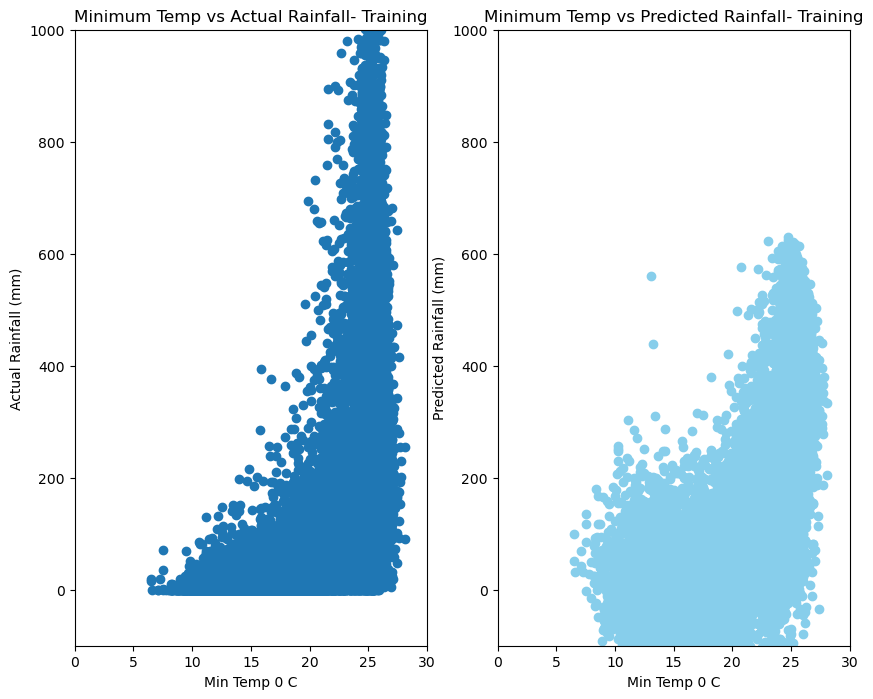

In [50]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.scatter(MLR_result_train['Min Temp'],MLR_result_train['Rainfall'])
plt.axis([0, 30, -100, 1000])
plt.title("Minimum Temp vs Actual Rainfall- Training")
plt.xlabel("Min Temp 0 C")
plt.ylabel("Actual Rainfall (mm)")
plt.subplot(1, 2, 2)
plt.scatter(MLR_result_train['Min Temp'],MLR_result_train['Predicted Rainfall (mm)'],color = "skyblue")
plt.axis([0, 30, -100, 1000])
plt.title("Minimum Temp vs Predicted Rainfall- Training")
plt.xlabel("Min Temp 0 C")
plt.ylabel("Predicted Rainfall (mm)")
plt.show()

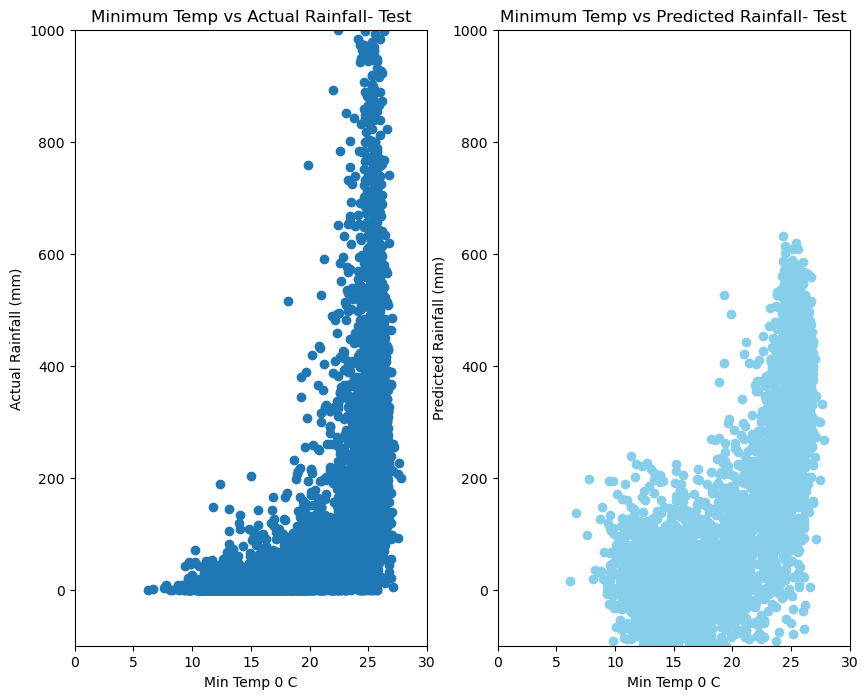

In [51]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.scatter(MLR_result_test['Min Temp'],MLR_result_test['Rainfall'])
plt.axis([0, 30, -100, 1000])
plt.title("Minimum Temp vs Actual Rainfall- Test")
plt.xlabel("Min Temp 0 C")
plt.ylabel("Actual Rainfall (mm)")
plt.subplot(1, 2, 2)
plt.scatter(MLR_result_test['Min Temp'],MLR_result_test['Predicted Rainfall (mm)'],color = "skyblue")
plt.axis([0, 30, -100, 1000])
plt.title("Minimum Temp vs Predicted Rainfall- Test")
plt.xlabel("Min Temp 0 C")
plt.ylabel("Predicted Rainfall (mm)")
plt.show()